<a href="https://colab.research.google.com/github/nHunter0/Resistor-Detector-/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
#importing resitor dataset from kaggle
files.upload() #uploading kaggle.json found in account settings on kaggle.com

#changing permissions on kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# downloading, ziping, unziping and removing zip
! kaggle datasets download -d eralpozcan/resistor-dataset
! mkdir train
! unzip \*.zip -d train
! rm *.zip

#test script
dir_path = './train'
files = os.listdir(dir_path)
for file in files:
  print(file)


Saving kaggle.json to kaggle.json
100% 474M/474M [00:06<00:00, 91.8MB/s]
100% 474M/474M [00:06<00:00, 82.3MB/s]
Archive:  resistor-dataset.zip
  inflating: train/100R_1-4W/100R_1-4W_(1).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(10).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(100).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(101).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(102).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(103).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(104).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(105).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(106).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(107).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(108).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(109).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(11).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(110).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(111).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(112).jpg  
  inflating: train/100R_1-4W/100R_1-4W_(114).

In [7]:
def load_data(data_dir, img_height=64, img_width=64, split=0.2):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=split)

    train_generator = datagen.flow_from_directory(
        directory=data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        seed=123
    )

    validation_generator = datagen.flow_from_directory(
        directory=data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical',
        subset='validation',
        seed=123
    )

    return train_generator, validation_generator

Found 2318 images belonging to 37 classes.
Found 563 images belonging to 37 classes.


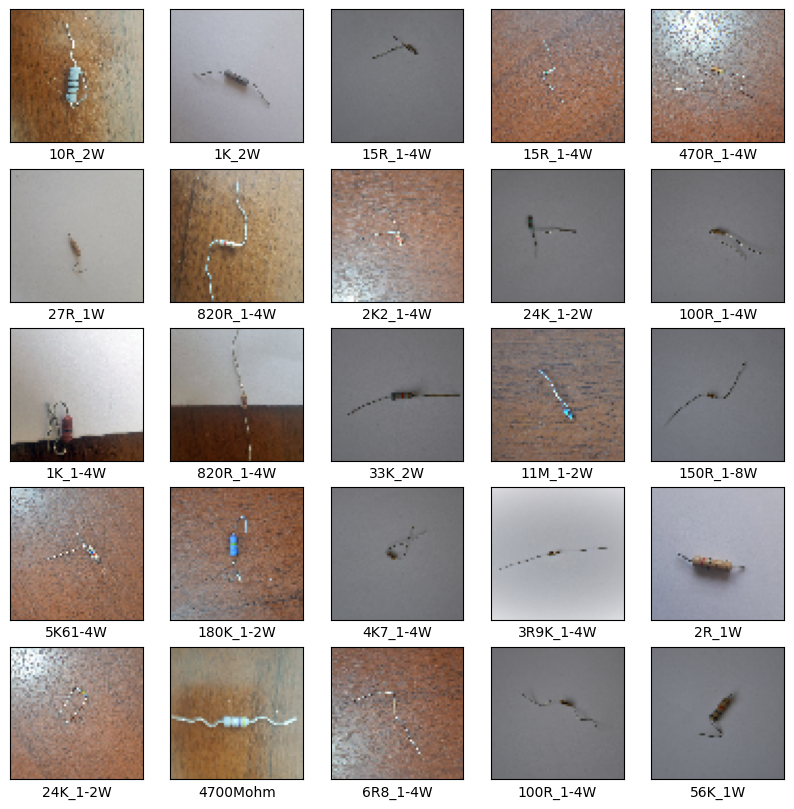

In [12]:
train_data, test_data = load_data('train')
class_names = list(train_data.class_indices.keys())
test_images, test_labels = next(train_data)  # get one batch of images and labels

#test script - show 25 images from dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    label_index = np.argmax(test_labels[i])  # find index of the class label
    plt.xlabel(class_names[label_index])
plt.show()

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a flatten layer
model.add(Flatten())

# Add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(37, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(train_data,
                    epochs=50,
                    validation_data=test_data)


In [ ]:
#Saving modle
model.save('resisitor_modle.h5')
files.download('resisitor_modle.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Modle evaluation
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test acc: {test_acc}')
print(f'Test loss: {test_loss}')

# Plots
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')